In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_excel("Online Retail.xlsx")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [8]:
df = df.dropna(subset=['CustomerID'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [9]:
df = df[df['Quantity'] > 0]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      397924 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


**Monetory:** Total money spent by each customer.

In [10]:
df['Monetory'] = df['Quantity'] * df['UnitPrice']
Monetory = df.groupby('CustomerID')['Monetory'].sum().reset_index()


**Recency:** how recently a customer made a purchase.

In [11]:
Reference_Date = df['InvoiceDate'].max() + pd.Timedelta(days=1)
Recency = df.groupby('CustomerID')['InvoiceDate'].max().reset_index()
Recency['Recency'] = (Reference_Date - Recency['InvoiceDate']).dt.days
Recency = Recency[['CustomerID', 'Recency']]
print(Recency)

      CustomerID  Recency
0        12346.0      326
1        12347.0        2
2        12348.0       75
3        12349.0       19
4        12350.0      310
...          ...      ...
4334     18280.0      278
4335     18281.0      181
4336     18282.0        8
4337     18283.0        4
4338     18287.0       43

[4339 rows x 2 columns]


**Frequency:** how many purchases a customer made

In [12]:
frequency = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
frequency.columns = ['CustomerID', 'Frequency']
print(frequency)

      CustomerID  Frequency
0        12346.0          1
1        12347.0          7
2        12348.0          4
3        12349.0          1
4        12350.0          1
...          ...        ...
4334     18280.0          1
4335     18281.0          1
4336     18282.0          2
4337     18283.0         16
4338     18287.0          3

[4339 rows x 2 columns]


### **Merging R, F, M into one DataFrame**

In [13]:
RFM = Recency.merge(frequency, on='CustomerID')
RFM = RFM.merge(Monetory, on='CustomerID')
RFM.head()

,CustomerID,Recency,Frequency,Monetory
0,12346.0,326,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,310,1,334.40


###  **R, F, M scores**

In [14]:
RFM['R_Scores'] = pd.qcut(RFM['Recency'],5, labels = [5,4,3,2,1], duplicates='drop')
RFM['f_Scores'] = pd.qcut(RFM['Frequency'].rank(method='first'),5, labels = [1,2,3,4,5], duplicates='drop')
RFM['M_Scores'] = pd.qcut(RFM['Monetory'],5, labels = [1,2,3,4,5], duplicates='drop')
RFM.head()

,CustomerID,Recency,Frequency,Monetory,R_Scores,f_Scores,M_Scores
0,12346.0,326,1,77183.60,1,1,5
1,12347.0,2,7,4310.00,5,5,5
2,12348.0,75,4,1797.24,2,4,4
3,12349.0,19,1,1757.55,4,1,4
4,12350.0,310,1,334.40,1,1,2


### **Combine scores**

In [15]:
RFM['RFM_Score'] = RFM['R_Scores'].astype(str) + RFM['f_Scores'].astype(str) + RFM['M_Scores'].astype(str)


### **Top 10 Customers**

In [16]:
RFM['RFM_Total'] = (
    RFM['R_Scores'].astype(int) +
    RFM['f_Scores'].astype(int) +
    RFM['M_Scores'].astype(int)
)
Top10 = RFM.sort_values('RFM_Total', ascending=False).head()
print(Top10)


      CustomerID  Recency  Frequency  Monetory R_Scores f_Scores M_Scores  \
4337     18283.0        4         16   2094.88        5        5        5   
1960     15033.0        5         10   2586.67        5        5        5   
4310     18245.0        7          7   2567.06        5        5        5   
1965     15039.0       10         47  19914.44        5        5        5   
4308     18241.0       10         17   2073.09        5        5        5   

     RFM_Score  RFM_Total  
4337       555         15  
1960       555         15  
4310       555         15  
1965       555         15  
4308       555         15  


### **Customer Segmentation**

In [17]:
def segment_customer(row):
    if row['R_Scores'] >= 4 and row['f_Scores'] >= 4 and row['M_Scores'] >= 4:
        return 'Platinum'
    elif row['R_Scores'] >= 4 and row['f_Scores'] >= 3:
        return 'Loyal Customers'
    elif row['R_Scores'] <= 2 and row['f_Scores'] >= 3:
        return 'At Risk'
    elif row['R_Scores'] <= 2 and row['f_Scores'] <= 2:
        return 'Lost Customers'
    else:
        return 'Potential'


### **Applying segmentation function**

In [18]:
RFM['Customer_Segmentations'] = RFM.apply(segment_customer, axis =1)
RFM.head()

,CustomerID,Recency,Frequency,Monetory,R_Scores,f_Scores,M_Scores,RFM_Score,RFM_Total,Customer_Segmentations
0,12346.0,326,1,77183.60,1,1,5,115,7,Lost Customers
1,12347.0,2,7,4310.00,5,5,5,555,15,Platinum
2,12348.0,75,4,1797.24,2,4,4,244,10,At Risk
3,12349.0,19,1,1757.55,4,1,4,414,9,Potential
4,12350.0,310,1,334.40,1,1,2,112,4,Lost Customers


In [19]:
RFM['Customer_Segmentations'].value_counts()

,count
Customer_Segmentations,
Potential,1178
Lost Customers,1065
Platinum,962
At Risk,643
Loyal Customers,491


### **Analyze each segment**

In [20]:
Summary = RFM.groupby('Customer_Segmentations').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetory': 'mean',
    'CustomerID': 'count'
}).rename(columns={'CustomerID': 'Customer_Count'})

Summary



,Recency,Frequency,Monetory,Customer_Count
Customer_Segmentations,,,,
At Risk,152.844479,3.405910,1244.994636,643
Lost Customers,217.897653,1.101408,487.707579,1065
Loyal Customers,16.122200,2.953157,1085.284075,491
Platinum,12.861746,11.082121,6038.816081,962
Potential,43.130730,2.599321,1060.485764,1178


## **Visualization**

### **Count of customers per segment**

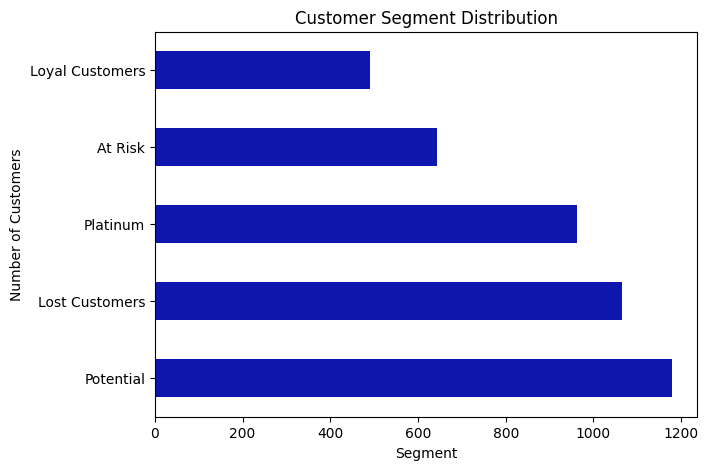

In [21]:
segment_counts = RFM['Customer_Segmentations'].value_counts()
segment_counts.plot(kind='barh', color='#0e16ad', figsize=(7,5))
plt.title('Customer Segment Distribution')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.show()


### **Average values**

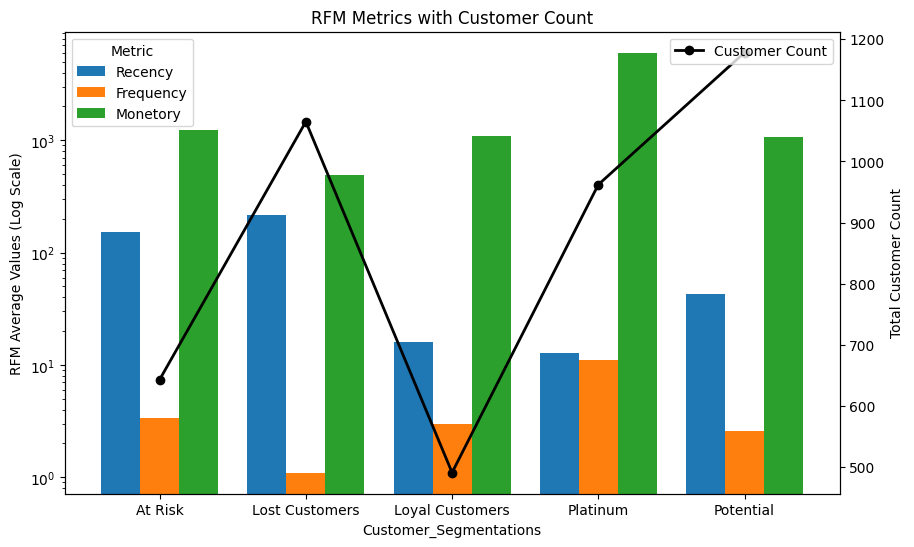

In [22]:
metrics = Summary[['Recency','Frequency','Monetory']]

ax = metrics.plot(kind='bar', figsize=(10,6), width=0.8)

ax2 = ax.twinx()
Summary['Customer_Count'].plot(kind='line', color='black', marker='o', ax=ax2, linewidth=2)

ax.set_yscale('log')
plt.title('RFM Metrics with Customer Count')
ax.set_ylabel('RFM Average Values (Log Scale)')
ax2.set_ylabel('Total Customer Count')
ax.legend(loc='upper left', title='Metric')
ax.set_xticklabels(metrics.index, rotation=0)
ax2.legend(['Customer Count'], loc='upper right')

plt.show()